In [3]:
import numpy as np
import pandas as pd
import time
import sys
import pyproj
from pyproj import Proj, transform, CRS
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import pylab as pl
import matplotlib
import seaborn as sns
from datetime import datetime, date
import datetime
import os
os.environ["PROJ_LIB"] = "/Users/onurhanaydin/opt/anaconda3/envs/geo_env2/share/basemap/epsg"
from mpl_toolkits.basemap import Basemap, shiftgrid
import PseudoNetCDF as pnc
from PseudoNetCDF import PNC
from PseudoNetCDF.pncparse import pncparse
from PseudoNetCDF.coordutil import gettimes
import pyproj
import pygeos
import xarray as xr
import nctoolkit as nc
import rioxarray
from netCDF4 import Dataset as NetCDFFile 
import icartt as ic
import geopandas as gpd
import fiona
from shapely.geometry import Polygon, Point
from geopy.geocoders import Nominatim
import timeit
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20) 
pd.options.display.float_format = "{:.3f}".format 

path = "/Users/onurhanaydin/Desktop/Liminalytics/"
opath = "/Users/onurhanaydin/Desktop/"

In [59]:
ds = xr.open_dataset(path+"copernicus_data/rcp85.nc")

long=ds['lon'][0,:]
latt=ds['lat'][:,0]
ds = ds.reset_coords()
ds = ds.assign_coords({'x':long,'y':latt})
ds = ds.drop(["lon", "lat", "time_bnds", "height"])
ds.to_netcdf(path+"copernicus_data/"+"rcp85_new.nc")
#ds# = ds.rio.set_spatial_dims('x', 'y')
#ds.sel(x=9.032, y=2.021, method='nearest')

In [26]:
from dask.base import tokenize

add_path=path+"copernicus_data/"
    
ds = xr.open_mfdataset(add_path+"*_rcp85.nc")
#    ds.to_netcdf(add_path+"com"+str(k)+".nc") # com: combined
    
#ds= xr.open_mfdataset(add_path+"nov/"+"extrCPPin20181007*.nc")
ds.to_netcdf(add_path+"rcp85.nc")


### Reading the dataset

In [2]:
dfp = pd.read_excel(path+'projected_impacts.xlsx',sheet_name="Sheet2") #usecols="E,F,G,I,J,L,O,U")
dffao = pd.read_excel(path+'fao.xlsx',sheet_name="Sheet4")

Welcome to Liminalytics!

Please enter the latitude (eg. -3.345):
50
Please enter the longitude (e.g. 0.421):
10
the closest point for Hasegawa at al: [51.1657 10.4515]
Country: Germany

The available crop(s) for the given location: ['maize' 'wheat']

Please write the name of the available crop to choose: maize


MAIZE

 - Length of growing period: 80-110 days (early)

                            110-140 days (medium)

- Positive key variable: Precipitation, cool weather (18-20°C)

- Negative key variable: Frost, Extrem high temperature

- Present world production is about 594 million tons grain from about 139 million ha.



Vulnerability Curve

- For the maize crop, the database contains 344 observations.

- Darkest, middle, and lightest lines show responses at the 75th, 50th, and 25th quantiles of baseline growing-season temperature, respectively.

- Dashed lines show the 95% confidence interval.

- The histograms show the number of observations by crop and level of warming used to e

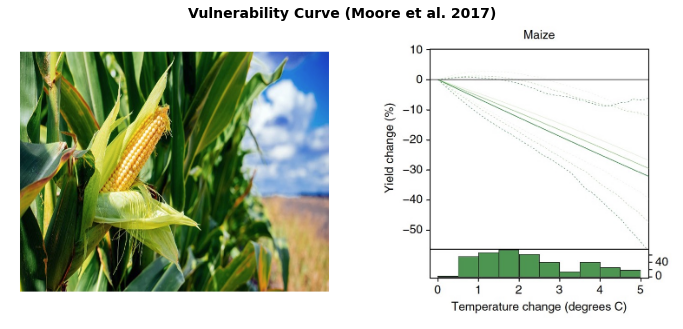

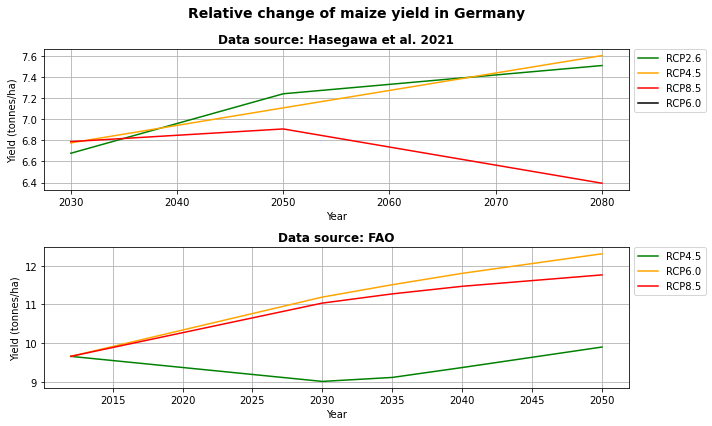

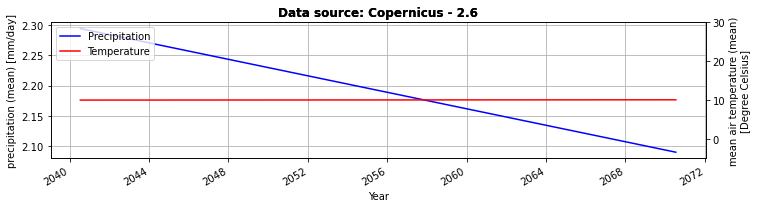

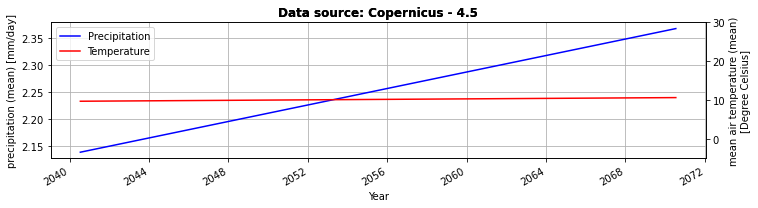

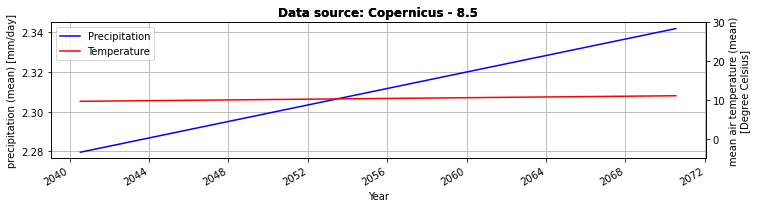

In [13]:
import matplotlib.image as mpimg

df = dfp.copy()
dff = dffao.copy()

########################################################################################
# Since other climate scenarios that we are unfamiliar are available, I filter out the data by climate scenarios.

df=df[(df["Climate scenario"]=="RCP2.6")|(df["Climate scenario"]=="RCP4.5")|
                          (df["Climate scenario"]=="RCP6.0")|(df["Climate scenario"]=="RCP8.5")]
########################################################################################
print("Welcome to Liminalytics!\n")

while True:
    
    lati = float(input("Please enter the latitude (eg. -3.345):\n")) 
    loni = float(input("Please enter the longitude (e.g. 0.421):\n"))
    
    dft=pd.DataFrame()
    dft["lat"]=df["lat"]
    dft["lon"]=df["lon"]
    dft=dft.dropna(how="any")

########################################################################################
# Thanks to below command lines, the algorithm would give the nearest available coordinates.
    A=np.array(dft)
    leftbottom = np.array((lati,loni))
    distances = np.linalg.norm(A-leftbottom, axis=1)
    min_index = np.argmin(distances)
########################################################################################   
    lat=A[min_index][0]
    lon=A[min_index][1]
######################################################################################## 
# The algorithm adjust the new database according to the given coordinates.

    df=df[(df["lat"]==lat)&(df["lon"]==lon)]
    r_name=df['Country'].iloc[0]
    dff=dff[dff["Country"]==r_name]
    
    print(f"the closest point for Hasegawa at al: {A[min_index]}\nCountry: {r_name}\n")
    
    a=df.Crop.unique() # It shows the crop(s) available for only the given coordinates.
    
    print(f"The available crop(s) for the given location: {a}\n")
    
    crop=input("Please write the name of the available crop to choose: ")
    
    fig= plt.subplots(figsize=(12,12))
    
    plt.title("Vulnerability Curve (Moore et al. 2017)", fontsize=14, fontweight="bold")
    #plt.title("The Source: Moore et al. 2017", fontweight="bold")
    
    if crop.casefold()=="maize":
      df=df[df["Crop"]=="maize"]
      dff=dff[dff["Crop"]=="maize"]
      print("\n\nMAIZE\n\n - Length of growing period: 80-110 days (early)\n")
      print("                            110-140 days (medium)\n")
      print("- Positive key variable: Precipitation, cool weather (18-20°C)\n")
      print("- Negative key variable: Frost, Extrem high temperature\n")
      print("- Present world production is about 594 million tons grain from about 139 million ha.\n")
      print("\n\nVulnerability Curve\n")
      img = mpimg.imread(path+"maize_all.jpeg")
      plt.axis('off')
      plt.imshow(img)
      print("- For the maize crop, the database contains 344 observations.\n")
    
    elif crop.casefold()=="wheat":
      df=df[df["Crop"]=="wheat"]
      dff=dff[dff["Crop"]=="wheat"]
      print("\n\nWHEAT\n\n- Length of growing period: 100-130 days (spring wheat)\n")
      print("                            180-250 days (winter wheat)\n")
      print("- Positive key variable: Precipitation, cool weather (15-20°C)\n")
      print("- Negative key variable: Extrem high temperature\n")
      print("- Present world production is about 582.7 million tons from 213.8 million ha.\n")
      print("\n\nVulnerability Curve\n")
      img = mpimg.imread(path+"wheat_all.jpeg")
      plt.axis('off')
      plt.imshow(img)
      print("- For the wheat crop, the database contains 336 observations.\n")
        
    elif crop.casefold()=="rice":
      df=df[df["Crop"]=="rice"]
      dff=dff[dff["Crop"]=="rice"]
      print("\n\nRICE\n\n- Length of growing period: 120 days\n")
      print("- Positive key variable: Precipitation, cool weather (18-35°C)\n")
      print("- Negative key variable: Extrem high and low temperature\n")
      print("- Present world production is about 834.1 million tons of beans over 756.7 million ha.\n")
      print("\n\nVulnerability Curve\n")
      img = mpimg.imread(path+"rice_all.jpeg")
      plt.axis('off')
      plt.imshow(img)
      print("- For the rice crop, the database contains 238 observations.\n")

    elif crop.casefold()=="soybean":
      df=df[df["Crop"]=="soybean"]
      dff=dff[dff["Crop"]=="soybean"]
      print("\n\nSOYBEAN\n\n- Length of growing period: 100-130 days\n")
      print("- Positive key variable: Precipitation, cool weather (25-35°C)\n")
      print("- Negative key variable: Extrem high temperature\n")
      print("- Present world production is about 176.6 million tons of beans over 75.5 million ha.\n")
      print("\n\nVulnerability Curve\n")
      img = mpimg.imread(path+"soybean_all.jpeg")
      plt.axis('off')
      plt.imshow(img)
      print("- For the wheat crop, the database contains 92 observations.\n")
    
    else :
        print("You didn't choose a product. Please, try again!")
        break
    
    print("- Darkest, middle, and lightest lines show responses at the 75th, 50th, and 25th quantiles of baseline growing-season temperature, respectively.\n")
    print("- Dashed lines show the 95% confidence interval.\n")
    print("- The histograms show the number of observations by crop and level of warming used to estimate the response functions.\n")
    
    c_name=df["Crop"].iloc[0]

    fig, axes = plt.subplots(2,1, figsize=(10,6))
    fig.suptitle("Relative change of "+str(c_name)+" yield in "+str(r_name), fontsize=14, fontweight="bold")

    sns.set_palette(['g','orange','r','black'], n_colors=5)
    sns.lineplot(data=df, y="Yield (tonnes/ha)", x="Year", hue="Climate scenario", ci=None, ax=axes[0])
    axes[0].set_title("Data source: Hasegawa et al. 2021", fontweight="bold")
    axes[0].grid()
    axes[0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    #axes[0].axhline(1.25)
    plt.tight_layout()

    sns.lineplot(data=dff, y="Yield (tonnes/ha)", x="Year", hue="Climate scenario", ci=None, ax=axes[1])
    axes[1].set_title("Data source: FAO", fontweight="bold")
    axes[1].grid()
    plt.tight_layout() 
    axes[1].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.show()
    fig.savefig(opath+'product.png',facecolor='white', bbox_inches='tight');
########################################################################################   
    sce = ["2.6", "4.5", "8.5"]

    for i in np.arange(0,3):

        fig, axes = plt.subplots(figsize=(10,3), sharey=True)

        ds = xr.open_dataset(path+"copernicus_data/rcp"+str(sce[i])+"_new.nc")
        ds = ds.sel(x=loni, y=lati, method="nearest")

        line1=ds["pr_tmean"].plot.line(ax=axes, color="blue", label="Precipitation")
        axes.set_title("Data source: Copernicus - " + str(sce[i]), fontweight="bold")
        axes.set_xlabel('Year')
        axes.grid()
        plt.tight_layout()

        ax2=axes.twinx()
        line2=ds["tas_tmean"].plot.line(ax=ax2, color="red", label="Temperature")
        ax2.set_title("Data source: Copernicus - "+ str(sce[i]), fontweight="bold")
        ax2.set_ylim(-5,30)

        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        axes.legend(lines, labels, loc=2)

        plt.show()

        fig.savefig(opath+'product' + str(i) + '.png',facecolor='white', bbox_inches='tight');
    
    break
